In [1]:
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/task2 database.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/task2 database.zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:

BASE_DIR = '/content/UTKFace'
age_labels = []
nationality_labels = []
image_paths = []
image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
    image_path = os.path.join(BASE_DIR, image)
    img_components = image.split('_')

    # Validate if the filename has at least 3 components (age, gender, nationality)
    if len(img_components) >= 3:
        try:
            age = int(img_components[0])
            nationality = int(img_components[2])

            # Append only if both age and nationality are successfully parsed
            age_labels.append(age)
            nationality_labels.append(nationality)
            image_paths.append(image_path)

        except ValueError:
            print(f"Skipping file: {image} due to invalid age or nationality format.")
    else:
        print(f"Skipping file: {image} due to insufficient components in filename.")

print(f"Age count: {len(age_labels)}")
print(f"Nationality count: {len(nationality_labels)}")
print(f"Image path count: {len(image_paths)}")

  0%|          | 0/23708 [00:00<?, ?it/s]

Skipping file: 61_1_20170109150557335.jpg.chip.jpg due to invalid age or nationality format.
Skipping file: 39_1_20170116174525125.jpg.chip.jpg due to invalid age or nationality format.
Skipping file: 61_1_20170109142408075.jpg.chip.jpg due to invalid age or nationality format.
Age count: 23705
Nationality count: 23705
Image path count: 23705


In [4]:
nationality_mapping = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others"}

In [5]:
df = pd.DataFrame({'age': age_labels, 'nationality': nationality_labels, 'image_path': image_paths})
df['age'] = df['age'].astype('int32')
df['nationality'] = df['nationality']
df['image_path'] = df['image_path'].astype('str')
df.head(5)

,age,nationality,image_path
0,8,0,/content/UTKFace/8_1_0_20170103162925343.jpg.c...
1,78,0,/content/UTKFace/78_0_0_20170111221840478.jpg....
2,8,0,/content/UTKFace/8_1_0_20170109203429413.jpg.c...
3,25,3,/content/UTKFace/25_1_3_20170117151958483.jpg....
4,10,0,/content/UTKFace/10_1_0_20170109203512075.jpg....


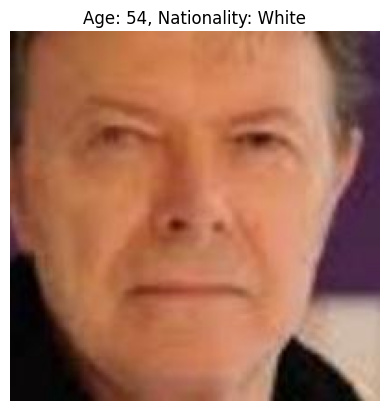

In [6]:
from PIL import Image

rand_index = random.randint(0, len(image_paths) -1)
age = df['age'][rand_index]
nationality = df['nationality'][rand_index]
img = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age}, Nationality: {nationality_mapping[nationality]}')
plt.axis('off')
plt.imshow(img)

In [7]:
train, test = train_test_split(df, train_size=0.8, random_state=42)

In [10]:
def extract_image_features(images):
  features = list()
  for image in tqdm(images):
    img = load_img(image, color_mode='rgb')
    img = img.resize((224, 224))
    img = np.array(img)
    features.append(img)

  features = np.array(features)
  features = features.reshape(len(features), 224, 224, 3)
  return features

In [ ]:
X = extract_image_features(df['image_path'])
y_age = np.array(train.age)
y_nationality = np.array(train.nationality)

  0%|          | 0/18964 [00:00<?, ?it/s]

In [22]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Check the shapes of your target variables:
print("Shape of y_age:", y_age.shape)
print("Shape of y_nationality:", y_nationality.shape)

# Ensure y_age is a column vector:
y_age = y_age.reshape(-1, 1)  # Reshape to (num_samples, 1)

# Ensure y_nationality is one-hot encoded with the correct shape:
if y_nationality.ndim == 1:
  y_nationality = to_categorical(y_nationality, num_classes=5)  # Adjust num_classes if needed

# Check for empty or incorrect values:
print("Number of unique values in y_age:", len(np.unique(y_age)))
print("Number of unique values in y_nationality:", len(np.unique(y_nationality)))

# Before asserting, investigate the mismatch:
print("Number of samples in X:", X.shape[0])
print("Number of samples in y_age:", y_age.shape[0])
print("Number of samples in y_nationality:", y_nationality.shape[0])

# Instead of asserting, filter X to match the number of samples in y:
X = X[:y_age.shape[0]]  # Select only the first y_age.shape[0] samples from X

# Now you can verify (or assert) that the shapes match:
print("New shape of X:", X.shape)
assert X.shape[0] == y_age.shape[0] == y_nationality.shape[0], "Input and target data have different number of samples."

Shape of y_age: (18964, 1)
Shape of y_nationality: (10, 5)
Number of unique values in y_age: 103
Number of unique values in y_nationality: 2
Number of samples in X: 18964
Number of samples in y_age: 18964
Number of samples in y_nationality: 10
New shape of X: (18964, 224, 224, 3)


AssertionError: Input and target data have different number of samples.

In [14]:
input_shape = (224,224,3)

In [16]:
inputs = Input((input_shape))
#conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
#max_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
#conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(max_1)
#max_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
#conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(max_2)
#max_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
#conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(max_3)
#max_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False
A = base_model.output
flatten = Flatten()(A)

dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(128, activation='relu')(flatten)

dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_2)

output_age = Dense(1, activation='linear', name='age_output')(dropout_1)
output_nationality = Dense(5, activation='softmax', name='nationality_output')(dropout_2)

model = Model(inputs=inputs, outputs=[output_age, output_nationality])
model.compile(optimizer='adam', loss={'age_output':'mean_squared_error', 'nationality_output':'categorical_crossentropy'}, metrics={'age_output':'mean_absolute_error', 'nationality_output':'accuracy'})

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 224, 224, 64)   │          1,792 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 224, 224, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 112, 112, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 112, 112, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 112, 112, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 56, 56, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 56, 56, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 28, 28, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 28, 28, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 14, 14, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 24,349,766 (92.89 MB)

 Trainable params: 9,635,078 (36.75 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback to save the model with the best 'race_output' performance
checkpoint = ModelCheckpoint(
    'best_model_by_nationality_output.keras',  # Path where the best model will be saved
    monitor='val_nationality_output_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min',  # Mode for the metric: 'min' for loss
    verbose=1  # Verbosity level
)

history = model.fit(X, {'age_output':y_age, 'nationality_output':y_nationality}, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/20


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m138778114382320\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=uint8)\n  • training=True\n  • mask=None'

In [17]:
def get_image_features(image):
  img = load_img(image, color_mode='rgb')
  img = img.resize((128, 128))
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255
  return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


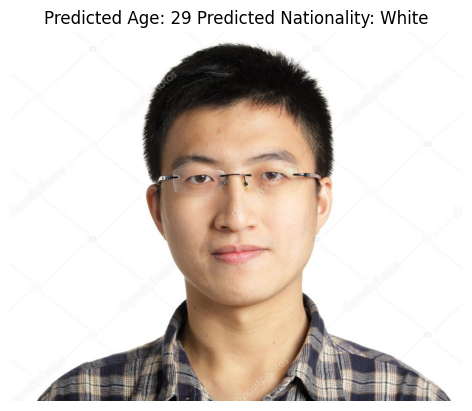

In [22]:
img_to_test = '/content/drive/My Drive/tests/asian2.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
age = round(pred[0][0][0])
nationality = nationality_mapping[np.argmax(pred[1][0])]
plt.title(f'Predicted Age: {age} Predicted Nationality: {nationality}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))